# **Project Summary**
---

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
import xgboost as xgb
import json
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)

---
## 1.Preprocessed Dataset

### 1.1 Preprocessed Dataset 1


We first combine all the rental data and external data together and then drop all duplicated data. After that, we drop all unresaonable value. Such as distance < 0. Finally, we drop all the outilers and change Nan value to median.

In [4]:
newdf = pd.read_csv('../data/cleaned_data.csv')
newdf = newdf.drop('Unnamed: 0',axis=1)

In [5]:
newdf

,bathrooms,bedrooms,carspaces,postcode,surburb,year,month,rent,distance_to_melbourne,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,university,garden,park,playground,pitch,bus_count,bus_distance,school_count,school_distance,tram_distance,tram_count,train_distance,train_count,hospital_count,shopping_mall_distance,shopping_mall_count,offence count,incidents recorded,Median_age,median,population,RentPrice_log,has_bond,count,cpi,gdp
0,1.0,1.0,0.0,3205,south melbourne,2019,1,360.0,2990.7,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,0.0,8.0,16.0,10.0,5.0,10,0.375,3,0.577,0.116,24,2.804,0,0,1.388,0,22895,17201,38,66259.675774,12753,5.886104,0,1564,255.65,54254.86
1,2.0,2.0,1.0,3205,south melbourne,2019,1,725.0,3445.0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,0.0,8.0,16.0,10.0,5.0,10,0.730,3,0.299,0.111,24,2.442,0,0,1.714,0,22895,17201,38,66259.675774,12753,6.586172,0,1564,255.65,54254.86
2,1.0,2.0,0.0,3205,south melbourne,2019,1,500.0,4076.1,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,0.0,8.0,16.0,10.0,5.0,10,0.766,3,0.579,0.059,24,2.751,0,0,1.927,0,22895,17201,38,66259.675774,12753,6.214608,0,1564,255.65,54254.86
3,1.0,3.0,0.0,3205,south melbourne,2019,1,795.0,3871.4,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,0.0,8.0,16.0,10.0,5.0,10,0.209,3,0.165,0.139,24,3.457,0,0,1.304,0,22895,17201,38,66259.675774,12753,6.678342,0,1564,255.65,54254.86
4,2.0,2.0,0.0,3205,south melbourne,2019,1,825.0,3877.5,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,0.0,8.0,16.0,10.0,5.0,10,0.143,3,0.475,0.394,24,3.544,0,0,1.370,0,22895,17201,38,66259.675774,12753,6.715383,0,1564,255.65,54254.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97709,1.0,1.0,4.0,3460,daylesford,2022,8,475.0,112844.1,0.0,1.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,2,0.705,3,0.896,78.624,0,58.745,0,1,35.093,0,1879,1553,52,47811.172529,10028,6.163315,0,76,271.06,67464.39
97710,1.0,2.0,0.0,3396,hopetoun,2022,9,180.0,389513.0,0.0,3.0,0.0,1.0,0.0,4.0,0.0,1.0,0.0,0.0,5.0,1.0,8.0,1,0.186,2,0.477,315.390,0,294.648,0,1,110.839,0,268,188,37,55477.266641,6407,5.192957,0,3,271.06,67464.39
97711,1.0,3.0,1.0,3701,dartmouth,2022,5,280.0,408332.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,52.649,2,10.219,249.694,0,233.799,0,0,68.639,0,302,230,48,44583.025987,6181,5.634790,0,5,271.06,67464.39
97712,1.0,3.0,1.0,3701,dartmouth,2022,6,290.0,408275.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,52.627,2,10.283,249.772,0,233.877,0,0,68.662,0,302,230,48,44583.025987,6181,5.669881,0,5,271.06,67464.39


In [6]:
newdf.isnull().sum()

bathrooms                 0
bedrooms                  0
carspaces                 0
postcode                  0
surburb                   0
year                      0
month                     0
rent                      0
distance_to_melbourne     0
bench                     0
cafe                      0
childcare                 0
fast_food                 0
kindergarten              0
parking                   0
restaurant                0
place_of_worship          0
university                0
garden                    0
park                      0
playground                0
pitch                     0
bus_count                 0
bus_distance              0
school_count              0
school_distance           0
tram_distance             0
tram_count                0
train_distance            0
train_count               0
hospital_count            0
shopping_mall_distance    0
shopping_mall_count       0
offence count             0
incidents recorded        0
Median_age          

### 1.2 Preprocessed Dataset 2

Then we divide the preprocessed dataset 1 by bathrooms, bedrooms, carspaces, postcode, year and month. If these five features are same, then we divide them in the same group and calculate rent and all distance by mean. And we will use this dataset to model.

In [10]:
df = pd.read_csv('../data/cleaned_data_groupby.csv')
df = df.drop('Unnamed: 0',axis=1)

In [11]:
df

,bathrooms,bedrooms,carspaces,postcode,year,month,train_distance,train_count,hospital_count,shopping_mall_distance,shopping_mall_count,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,school_distance,university,garden,park,playground,pitch,offence count,incidents recorded,bus_distance,bus_count,school_count,school_distance.1,tram_distance,tram_count,rent,Median_age,median,population,has_bond,count,cpi,gdp,distance_to_melbourne
0,1.0,1.0,0.0,3205,2019,1,2.677111,0,0,1.341556,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,0.467667,0.0,8.0,16.0,10.0,5.0,22895,17201,0.504111,10,3,0.467667,0.124444,24,5.870629,38,66259.675774,1281,0,1564,255.65,54254.86,3192.022222
1,2.0,2.0,1.0,3205,2019,1,2.374714,0,0,1.422286,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,0.306429,0.0,8.0,16.0,10.0,5.0,22895,17201,0.730429,10,3,0.306429,0.162143,24,6.406003,38,66259.675774,1281,1,1564,255.65,54254.86,3158.428571
2,1.0,2.0,0.0,3205,2019,1,2.863250,0,0,1.663750,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,0.361250,0.0,8.0,16.0,10.0,5.0,22895,17201,0.570250,10,3,0.361250,0.151750,24,6.407817,38,66259.675774,12753,0,1564,255.65,54254.86,3791.175000
3,1.0,3.0,0.0,3205,2019,1,3.122500,0,0,1.413500,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,0.344500,0.0,8.0,16.0,10.0,5.0,22895,17201,0.318500,10,3,0.344500,0.112500,24,6.711789,38,66259.675774,12753,0,1564,255.65,54254.86,3563.500000
4,2.0,2.0,0.0,3205,2019,1,3.534400,0,0,1.388800,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,0.408600,0.0,8.0,16.0,10.0,5.0,22895,17201,0.137800,10,3,0.408600,0.334000,24,6.712508,38,66259.675774,12753,0,1564,255.65,54254.86,4003.820000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45180,1.0,1.0,4.0,3460,2022,8,58.745000,0,1,35.093000,0,0.0,1.0,0.0,0.0,0.0,4.0,2.0,0.0,0.896000,0.0,0.0,0.0,1.0,1.0,1879,1553,0.705000,2,3,0.896000,78.624000,0,6.163315,52,47811.172529,10028,0,76,271.06,67464.39,112844.100000
45181,1.0,2.0,0.0,3396,2022,9,294.648000,0,1,110.839000,0,0.0,3.0,0.0,1.0,0.0,4.0,0.0,1.0,0.477000,0.0,0.0,5.0,1.0,8.0,268,188,0.186000,1,2,0.477000,315.390000,0,5.192957,37,55477.266641,6407,0,3,271.06,67464.39,389513.000000
45182,1.0,3.0,1.0,3701,2022,5,233.799000,0,0,68.639000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.219000,0.0,0.0,0.0,0.0,0.0,302,230,52.649000,1,2,10.219000,249.694000,0,5.634790,48,44583.025987,6181,0,5,271.06,67464.39,408332.200000
45183,1.0,3.0,1.0,3701,2022,6,233.877000,0,0,68.662000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.283000,0.0,0.0,0.0,0.0,0.0,302,230,52.627000,1,2,10.283000,249.772000,0,5.669881,48,44583.025987,6181,0,5,271.06,67464.39,408275.900000


### 1.3 Preprocessed Dataset 3

This time we divide the the preprocessed dataset 1 by bathrooms, bedrooms, carspaces and postcodes. If these four features are same, then we divide them in the same group and calculate rent and all distance by mean. Assuming that each postcode housing data will not change from 2023 - 2025, we simulate the housing data from 2023 to 2025 based on the housing type. Then we import the Consumer Price Index forecast, Gross Domestic Product forecast and the address of the school that will be built in next three years as our new external data. Due to these features are all groupby years, we assume all the rental data in the same year share the same value.

In [8]:
df2 = pd.read_csv('../data/cleaned_data_groupby_predict.csv')
df2 = df2.drop('Unnamed: 0',axis=1)

In [9]:
df2

,bathrooms,bedrooms,carspaces,postcode,train_distance,train_count,hospital_count,shopping_mall_distance,shopping_mall_count,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,university,garden,park,playground,pitch,offence count,incidents recorded,bus_distance,bus_count,school_count,school_distance,tram_distance,tram_count,rent,Median_age,median,population,has_bond,count,distance_to_melbourne
0,1.0,1.0,0.0,3205,2.372479,0,0,1.530774,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.791281,10,3,322.777475,0.133295,24,5.873056,39,69810.297518,3730,0,1564,3374.803226
1,2.0,2.0,1.0,3205,2.411860,0,0,1.486444,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.738357,10,3,338.786401,0.183377,24,6.379859,39,69810.297518,6528,0,1564,4831.300966
2,1.0,2.0,0.0,3205,2.921702,0,0,1.482578,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.440760,10,3,312.059293,0.208787,24,6.361757,39,69810.297518,11759,0,1564,3558.056000
3,1.0,3.0,0.0,3205,3.144525,0,0,1.418525,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.290175,10,3,1755.760350,0.215850,24,6.570844,39,69810.297518,11759,0,1564,3563.095000
4,2.0,2.0,0.0,3205,3.165820,0,0,1.422120,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.337940,10,3,1405.033260,0.290900,24,6.580744,39,69810.297518,11759,1,1564,3721.170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7630,1.0,1.0,0.0,3730,194.874000,0,1,47.949000,0,4.0,5.0,0.0,0.0,0.0,23.0,2.0,3.0,0.0,1.0,8.0,2.0,4.0,4484,3479,0.139000,52,3,139867.023000,203.750000,0,5.560682,49,47388.455570,8703,0,99,273809.700000
7631,1.0,2.0,0.0,3730,194.874000,0,1,47.949000,0,4.0,5.0,0.0,0.0,0.0,23.0,2.0,3.0,0.0,1.0,8.0,2.0,4.0,4484,3479,0.139000,52,3,139867.121000,203.750000,0,5.991465,49,47388.455570,8703,0,99,273809.700000
7632,1.0,1.0,4.0,3461,57.521000,0,0,31.195000,0,0.0,3.0,0.0,1.0,0.0,18.0,2.0,4.0,0.0,0.0,12.0,2.0,12.0,1222,929,1.020000,13,5,139873.443000,76.880000,0,6.109248,37,55477.266641,10028,0,34,106427.300000
7633,1.0,3.0,0.0,3461,60.908000,0,0,37.292000,0,0.0,3.0,0.0,1.0,0.0,18.0,2.0,4.0,0.0,0.0,12.0,2.0,12.0,1222,929,0.406000,13,5,139873.991000,81.034000,0,6.109248,37,55477.266641,10028,0,34,117032.200000


In [12]:
df2 = df2.drop(['population'], axis = 1)

In [13]:
# Assume the data of the month of different years are the same
df3 = pd.DataFrame()
for year in range(2023,2026):
    for month in range(1,13):
        tmp_df = df2.copy()
        year_list = [year]*len(df2)
        month_list = [month]*len(df2)
        tmp_df['year'] = year_list
        tmp_df['month'] = month_list
        df3= pd.concat([df3,tmp_df])
df3 = df3.reset_index().drop(['index'],axis = 1)

In [15]:
# merge cpi by years 
cpi_df = pd.read_csv('../data/cpi.csv').drop({'Unnamed: 0'}, axis = 1)
df3 = df3.merge(cpi_df, on = 'year')

In [16]:
# merge gdp by years
xls = pd.ExcelFile('../data/gdp.xlsx')
df1 = pd.read_excel(xls, 'Data')[36:].drop('Unnamed: 0', axis = 1).rename({'Unnamed: 1':'year','Unnamed: 2':'gdp'},axis = 1).reset_index().drop('index',axis = 1)
gdp_list = df1['gdp']
l = []
m = 0
for i in range(2019,2026):
    l.append([i,gdp_list[m]])
    m = m+1
gdp_df = pd.DataFrame(l, columns=['year','gdp'])
df3 = df3.merge(gdp_df, on = 'year')

In [18]:
# renew school numbers of each regions
f = open("../data/year_school_address.txt")
data = json.load(f)
new_school = pd.DataFrame(data, columns=['year','link','address'])
def get_postcode(add):
    add_list = add.split(' ')
    return add_list[-1]
new_school['postcode'] = new_school['address'].apply(get_postcode)
school_dict = {}
for index, value in new_school.iterrows():
    year = value['year']
    postcode = value['postcode']
    key = year + ' ' + postcode
    if key not in school_dict.keys():
        school_dict[key] = 1
    else:
        school_dict[key] += 1
for index, values in df3.iterrows():
    year = str(values['year'])
    postcode = str(values['postcode'])
    key = year + ' ' + postcode
    if key in school_dict.keys():
        school_values = values['school']
        df3.loc[index,'school'] = school_values + school_dict[key]
df3

,bathrooms,bedrooms,carspaces,postcode,train_distance,train_count,hospital_count,shopping_mall_distance,shopping_mall_count,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,university,garden,park,playground,pitch,offence count,incidents recorded,bus_distance,bus_count,school_count,school_distance,tram_distance,tram_count,rent,Median_age,median,has_bond,count,distance_to_melbourne,year,month,cpi,gdp
0,1.0,1.0,0.0,3205,2.372479,0,0,1.530774,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.791281,10,3,322.777475,0.133295,24,5.873056,39,69810.297518,0,1564,3374.803226,2023,1,277.84,69717.12
1,2.0,2.0,1.0,3205,2.411860,0,0,1.486444,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.738357,10,3,338.786401,0.183377,24,6.379859,39,69810.297518,0,1564,4831.300966,2023,1,277.84,69717.12
2,1.0,2.0,0.0,3205,2.921702,0,0,1.482578,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.440760,10,3,312.059293,0.208787,24,6.361757,39,69810.297518,0,1564,3558.056000,2023,1,277.84,69717.12
3,1.0,3.0,0.0,3205,3.144525,0,0,1.418525,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.290175,10,3,1755.760350,0.215850,24,6.570844,39,69810.297518,0,1564,3563.095000,2023,1,277.84,69717.12
4,2.0,2.0,0.0,3205,3.165820,0,0,1.422120,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,0.0,8.0,16.0,10.0,5.0,22895,17201,0.337940,10,3,1405.033260,0.290900,24,6.580744,39,69810.297518,1,1564,3721.170000,2023,1,277.84,69717.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274855,1.0,1.0,0.0,3730,194.874000,0,1,47.949000,0,4.0,5.0,0.0,0.0,0.0,23.0,2.0,3.0,0.0,1.0,8.0,2.0,4.0,4484,3479,0.139000,52,3,139867.023000,203.750000,0,5.560682,49,47388.455570,0,99,273809.700000,2025,12,291.50,74353.74
274856,1.0,2.0,0.0,3730,194.874000,0,1,47.949000,0,4.0,5.0,0.0,0.0,0.0,23.0,2.0,3.0,0.0,1.0,8.0,2.0,4.0,4484,3479,0.139000,52,3,139867.121000,203.750000,0,5.991465,49,47388.455570,0,99,273809.700000,2025,12,291.50,74353.74
274857,1.0,1.0,4.0,3461,57.521000,0,0,31.195000,0,0.0,3.0,0.0,1.0,0.0,18.0,2.0,4.0,0.0,0.0,12.0,2.0,12.0,1222,929,1.020000,13,5,139873.443000,76.880000,0,6.109248,37,55477.266641,0,34,106427.300000,2025,12,291.50,74353.74
274858,1.0,3.0,0.0,3461,60.908000,0,0,37.292000,0,0.0,3.0,0.0,1.0,0.0,18.0,2.0,4.0,0.0,0.0,12.0,2.0,12.0,1222,929,0.406000,13,5,139873.991000,81.034000,0,6.109248,37,55477.266641,0,34,117032.200000,2025,12,291.50,74353.74


In [19]:
df3.to_csv('../data/finalized.csv')

---
## 2.Feature Selections


We then select features by Linear Regression with One Variable and mutual information regression, and keep the features shared by both tests

In [20]:
# feature selection
y = newdf['RentPrice_log']
X = newdf.drop(['RentPrice_log','rent','year','month','surburb','cpi', 'gdp'], axis=1)

selector = SelectKBest(f_regression, k = 30)
selector.fit(X, y)
needcolf = X.columns[selector.get_support()]
colf = []
for i in range(len(needcolf)):
    colf.append(needcolf[i])
colf.append('year')
colf.append('month')
print(colf)

from sklearn.feature_selection import SelectKBest, mutual_info_regression
selector = SelectKBest(mutual_info_regression, k = 28)
selector.fit(X, y)
needcomi = X.columns[selector.get_support()]
comi = []
for i in range(len(needcomi)):
    comi.append(needcomi[i])
comi.append('year')
comi.append('month')
print(comi)

['bathrooms', 'bedrooms', 'carspaces', 'postcode', 'distance_to_melbourne', 'bench', 'cafe', 'childcare', 'fast_food', 'parking', 'restaurant', 'place_of_worship', 'university', 'park', 'playground', 'pitch', 'bus_count', 'school_count', 'tram_distance', 'tram_count', 'train_distance', 'train_count', 'hospital_count', 'shopping_mall_distance', 'shopping_mall_count', 'offence count', 'incidents recorded', 'Median_age', 'median', 'has_bond', 'year', 'month']
['bathrooms', 'bedrooms', 'postcode', 'distance_to_melbourne', 'bench', 'cafe', 'fast_food', 'parking', 'restaurant', 'place_of_worship', 'garden', 'park', 'playground', 'pitch', 'bus_count', 'bus_distance', 'school_count', 'school_distance', 'tram_distance', 'tram_count', 'train_distance', 'shopping_mall_distance', 'offence count', 'incidents recorded', 'Median_age', 'median', 'population', 'count', 'year', 'month']


In [21]:
# find common features
common_features = set(colf) & set(comi)
features = []
for i in common_features:
    features.append(i)
features.append('cpi')
features.append('gdp')

Here are all the features that we will use to model.

In [22]:
features

['Median_age',
 'shopping_mall_distance',
 'park',
 'distance_to_melbourne',
 'cafe',
 'postcode',
 'bedrooms',
 'offence count',
 'restaurant',
 'place_of_worship',
 'bench',
 'tram_distance',
 'tram_count',
 'median',
 'fast_food',
 'incidents recorded',
 'playground',
 'year',
 'bus_count',
 'school_count',
 'month',
 'bathrooms',
 'train_distance',
 'pitch',
 'parking',
 'cpi',
 'gdp']

In [23]:
len(features)

27

---
## 3. Data Modeling

### 3.1 MLP Regressor

In [39]:
y = df['rent']
X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
nn = MLPRegressor()
nn.fit(X_train_std, y_train)
TrainScoreMLP = nn.score(X_train_std, y_train)
TestScoreMLP = nn.score(X_test_std, y_test)
print(f'model score on training data: {TrainScoreMLP}')
print(f'model score on testing data: {TestScoreMLP}')
# randomly select 100 data to draw graph
index = range(1,13555)
sample_index = np.random.choice(index, size = 100)
y_predict = nn.predict(X_test_std)
y_p_sample = []
y_t_sample = []
y_test = y_test.reset_index().drop('index', axis = 1)['rent']
for index in sample_index:
    y_p_sample.append(y_predict[index])
    y_t_sample.append(y_test[index])
y_predict = nn.predict(X_test_std)
# plot the predicted vs true y-value
plt.plot(range(len(y_p_sample)), y_p_sample, 'b', label="predict")
plt.plot(range(len(y_t_sample)), y_t_sample, 'g', label="test")
plt.legend(loc="upper right")  
plt.xlabel("the x")
plt.ylabel('value')
plt.show()
plt.savefig('../plots/MLP')

TypeError: list indices must be integers or slices, not str

### 3.2 XGB Regressor

model score on training data: 0.8919942528667427
model score on testing data: 0.7909457655261789


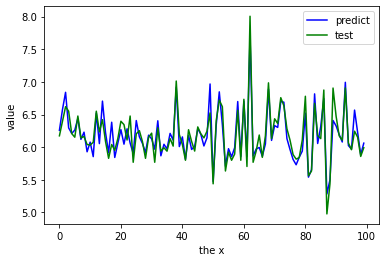

In [26]:
y = df['rent']
X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
xgbc = xgb.XGBRegressor(
    learning_rate = 0.1,
    n_estimators = 1000,
    max_depth = 4,
)
xgbc.fit(
    X_train_std, 
    y_train
)
TrainScoreXGB = xgbc.score(X_train_std, y_train)
TestScoreXGB = xgbc.score(X_test_std, y_test)
print(f'model score on training data: {TrainScoreXGB}')
print(f'model score on testing data: {TestScoreXGB}')

index = range(1,13555)
sample_index = np.random.choice(index, size = 100)
y_predict = xgbc.predict(X_test_std)
y_p_sample = []
y_t_sample = []
y_test = y_test.reset_index().drop('index', axis = 1)['rent']
for index in sample_index:
#     print(index)
    y_p_sample.append(y_predict[index])
    y_t_sample.append(y_test[index])

plt.plot(range(len(y_p_sample)), y_p_sample, 'b', label="predict")
plt.plot(range(len(y_t_sample)), y_t_sample, 'g', label="test")
plt.legend(loc="upper right")  
plt.xlabel("the x")
plt.ylabel('value')
plt.show()

### 3.3 Decision Tree Regressor

model score on training data: 0.9998824285624516
model score on testing data: 0.6182665877053087


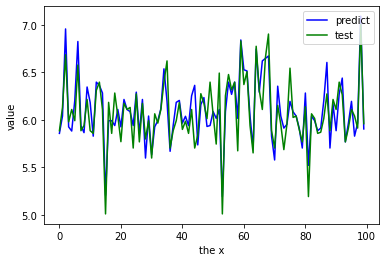

In [27]:
from sklearn.tree import DecisionTreeRegressor
y = df['rent']
X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
dt = DecisionTreeRegressor()
dt.fit(X_train_std, y_train)
TrainScoreDTR = dt.score(X_train_std, y_train)
TestScoreDTR = dt.score(X_test_std, y_test)
print(f'model score on training data: {TrainScoreDTR}')
print(f'model score on testing data: {TestScoreDTR}')

index = range(1,13555)
sample_index = np.random.choice(index, size = 100)
y_predict = dt.predict(X_test_std)
y_p_sample = []
y_t_sample = []
y_test = y_test.reset_index().drop('index', axis = 1)['rent']
for index in sample_index:
    y_p_sample.append(y_predict[index])
    y_t_sample.append(y_test[index])
    
plt.plot(range(len(y_p_sample)), y_p_sample, 'b', label="predict")
plt.plot(range(len(y_t_sample)), y_t_sample, 'g', label="test")
plt.legend(loc="upper right")  
plt.xlabel("the x")
plt.ylabel('value')
plt.show()

### 3.4 Random Forest Regressor

model score on training data: 0.8541206575403684
model score on testing data: 0.7629943138818839


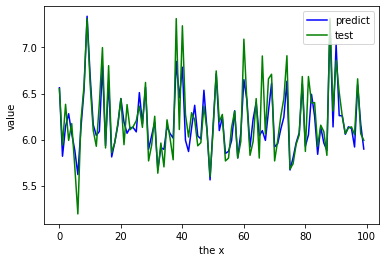

In [28]:
y = df['rent']
X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
rfc = RandomForestRegressor(max_depth=10)  
rfc = rfc.fit(X_train_std, y_train)
TrainScoreRFC = rfc.score(X_train_std, y_train)
TestScoreRFC = rfc.score(X_test_std, y_test)
print(f'model score on training data: {TrainScoreRFC}')
print(f'model score on testing data: {TestScoreRFC}')

index = range(1,13555)
sample_index = np.random.choice(index, size = 100)
y_predict = rfc.predict(X_test_std)
y_p_sample = []
y_t_sample = []
y_test = y_test.reset_index().drop('index', axis = 1)['rent']
for index in sample_index:

    y_p_sample.append(y_predict[index])
    y_t_sample.append(y_test[index])

plt.plot(range(len(y_p_sample)), y_p_sample, 'b', label="predict")
plt.plot(range(len(y_t_sample)), y_t_sample, 'g', label="test")
plt.legend(loc="upper right")  
plt.xlabel("the x")
plt.ylabel('value')
plt.show()

### 3.5 Linear Regression

model score on training data: 0.5031107430206395
model score on testing data: 0.5335725164456799


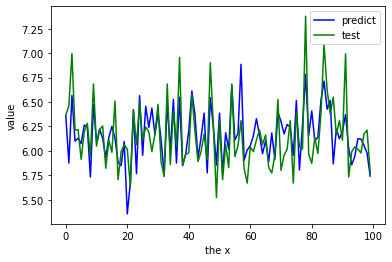

In [29]:
from sklearn.linear_model import LinearRegression
y = df['rent']
X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
lr = LinearRegression()
lr.fit(X_train_std, y_train)
TrainScoreLR = lr.score(X_train_std, y_train)
TestScoreLR = lr.score(X_test_std, y_test)
print(f'model score on training data: {TrainScoreLR}')
print(f'model score on testing data: {TestScoreLR}')

index = range(1,13555)
sample_index = np.random.choice(index, size = 100)
y_predict = lr.predict(X_test_std)
y_p_sample = []
y_t_sample = []
y_test = y_test.reset_index().drop('index', axis = 1)['rent']
for index in sample_index:
    y_p_sample.append(y_predict[index])
    y_t_sample.append(y_test[index])
    
plt.plot(range(len(y_p_sample)), y_p_sample, 'b', label="predict")
plt.plot(range(len(y_t_sample)), y_t_sample, 'g', label="test")
plt.legend(loc="upper right")  
plt.xlabel("the x")
plt.ylabel('value')
plt.show()

### Model comparison

Because of the highest Test Score, we finally choose XGBoost Regressor to be the model which will used to predict future price of rental. 


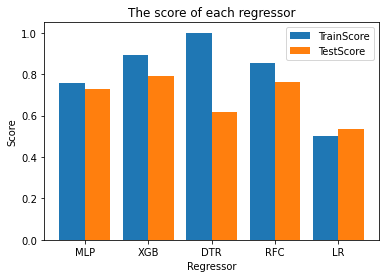

In [30]:
list1 = [TrainScoreMLP,TrainScoreXGB,TrainScoreDTR,TrainScoreRFC,TrainScoreLR]
list2 = [TestScoreMLP,TestScoreXGB,TestScoreDTR,TestScoreRFC,TestScoreLR]
list = ['MLP','XGB','DTR','RFC','LR']
x = np.arange(len(list1))
plt.figure()
total_width, n = 0.8, 2   
width = total_width / n   
x1 = x - width / 2   
x2 = x1 + width  
 
plt.title('The score of each regressor')   
plt.xlabel('Regressor')   
plt.ylabel("Score")   
plt.bar(x1, list1, width=width, label="TrainScore")
plt.bar(x2, list2, width=width, label="TestScore")
plt.xticks(x, list)  
plt.legend()   
plt.show()

---
## 4.Prediction

Due to we random select the test and train data set, so Top 10 regions will be a little different with presentation that we showed, which are Tyabb, Elwood, Hawthorn, south yarra, Toorak, Cottles Bridge, Hawthorn East, Nicholson, Armadale, st kilda east.

In [31]:
# prediction
df3 = df3[X_train.columns]
predict_std = sc.transform(df3)
rent_list = xgbc.predict(predict_std)
df3['predicted_rent'] = rent_list


In [32]:
# Drop all the repeated suburb or postcode
house = pd.read_csv("../data/prepared_data.csv")
suburb_postcode_df = house[['surburb','postcode']].drop_duplicates()
suburb_postcode_df

,surburb,postcode
0,south melbourne,3205
48,albert park,3206
152,port melbourne,3207
256,melbourne,3004
939,southbank,3006
...,...,...
113152,camperdown,3260
113154,tallangatta,3700
113155,eskdale,3701
113156,dartmouth,3701


In [33]:
# link postcode and suburb together
postcode_suburb_list = dict()
for index, value in suburb_postcode_df.iterrows():
    postcode = value['postcode']
    suburb = value['surburb']
    key = str(postcode)
    value_list = postcode_suburb_list.get(postcode,[])
    value_list.append(value)
    postcode_suburb_list[postcode] = value_list

In [34]:
p_list = []
for index, data in df3.iterrows():
    postcode = str(int(data['postcode']))
    df = postcode_suburb_list.get(int(postcode))
    if df is None:
        p_list.append(None)
    else:
        suburb_l = []
        for i in range(len(df)):
            suburb_l.append(df[i]['surburb'])

        p_list.append(suburb_l)
df3['suburb'] = p_list

In [35]:
# predict future price by year and postcode in log transform
suburb_mean_rent = pd.DataFrame(df3.groupby(['year','postcode']).mean('predicted_rent')['predicted_rent']).reset_index().rename({'predicted_rent':'rent'}, axis = 1)
suburb_mean_rent = suburb_mean_rent.rename({'predicted_rent_original':'rent'}, axis = 1)
suburb_mean_rent

,year,postcode,rent
0,2023,3000,6.756001
1,2023,3003,6.466152
2,2023,3004,6.809669
3,2023,3006,6.679940
4,2023,3008,6.808906
...,...,...,...
1132,2025,3977,6.048735
1133,2025,3978,6.213443
1134,2025,3980,6.315980
1135,2025,3981,6.360968


In [36]:
# combine all the data from 2019 - 2025 together and then give the increase rate of each year
history_rent = pd.DataFrame(newdf.groupby(['year','postcode']).mean('RentPrice_log')['RentPrice_log']).reset_index().rename({'surburb':'suburb','RentPrice_log':'rent'}, axis = 1)

combined_rent = pd.concat([history_rent, suburb_mean_rent])
combined_rent = combined_rent.sort_values(by = ['postcode','year']).reset_index().drop('index', axis = 1)

postcode_value = pd.DataFrame(combined_rent['postcode'].drop_duplicates())

l = []
for i in postcode_value['postcode']:
    for j in range(2019, 2026):
        l.append([i,j])
l = pd.DataFrame(l, columns=['postcode','year'])


com = combined_rent.merge(l, on = ['year','postcode'], how = 'right')
com = com.sort_values(by = ['postcode','year']).reset_index().drop('index', axis = 1)

yearly_growth_list = []
for name, group in com.groupby('postcode'):   
    group['lag(rent,1)'] = group['rent'].shift(1)
    growth_dict = dict()
    growth_dict['postcode'] = name
    for index, value in group.iterrows():
        rent = value['rent']
        lag = value['lag(rent,1)']
        rate = 0
        if pd.isna(lag):
            rete = 0
        else:
            rate = (rent-lag)/lag *100
        growth_dict['year'+ ' ' + str(int(value['year']))] = rate
    yearly_growth_list.append(growth_dict)
    
rate_df = pd.DataFrame(yearly_growth_list)
top_10 = rate_df.sort_values(by = ['year 2023','year 2024', 'year 2025'],ascending=False)[:10]
p_list = []
for index, data in top_10.iterrows():
    postcode = str(int(data['postcode']))
    df = postcode_suburb_list.get(int(postcode))
    if df is None:
        p_list.append(None)
    else:
        suburb_l = []
        for i in range(len(df)):
            suburb_l.append(df[i]['surburb'])

        p_list.append(suburb_l)
# top_10 = top_10.merge(suburb_postcode_df, on = 'postcode', how = 'left').drop_duplicates(subset='postcode')
top_10['surburb'] = p_list

In [37]:
top_10.fillna(0)

,postcode,year 2019,year 2020,year 2021,year 2022,year 2023,year 2024,year 2025,surburb
362,3927,0,2.238409,-2.330340,-4.955813,11.692769,0.0,0.0,[somers]
111,3141,0,-1.339225,-3.123194,0.425305,10.439508,0.0,0.0,[south yarra]
151,3184,0,-1.962011,-0.004126,-1.217064,9.878765,0.0,0.0,[elwood]
0,3000,0,-3.323466,-2.974639,3.928096,9.470954,0.0,0.0,[melbourne]
92,3122,0,-0.764852,-3.615463,1.529611,9.341063,0.0,0.0,[hawthorn]
112,3142,0,-0.516882,-1.320841,-0.874922,9.310311,0.0,0.0,[toorak]
149,3182,0,-0.855274,-1.666244,0.378635,9.040660,0.0,0.0,"[st kilda, st kilda west]"
2,3004,0,-2.191791,-2.450109,2.030674,8.500947,0.0,0.0,"[melbourne, melbourne st kilda road]"
152,3185,0,-2.643685,-0.814827,0.349182,7.889136,0.0,0.0,"[elsternwick, gardenvale, ripponlea]"
93,3123,0,-2.463014,-0.437931,0.935171,7.812923,0.0,0.0,[hawthorn east]


---
### 5.Liveability

We calculate 8 features with seperate weights, and then get top 10 liveable regions which are West Bendigo, Gerrigerrup, Hopetoun, Murtoa, Waurn Ponds, Wedderburn, Rupanyup, Curdievale,	Connewarre, Cobden.

In [38]:
details = []
for name, group in newdf.groupby('surburb'):
    rent = group['rent'].median()
    median_income = group['median'].fillna(0).median()
    house_cost = median_income/rent
    distance_to_central = 1/group['distance_to_melbourne'].fillna(0).median()

    bus = int(group['bus_count'].iloc[0]) * 1/(group['bus_distance'].mean())
    train = int(group['train_count'].iloc[0]) *1/(group['train_distance'].mean())
    tram = int(group['tram_count'].iloc[0]) * 1/(group['tram_distance'].mean())

    transport = bus + tram + train
    
    shopping_mall = int(group['shopping_mall_count'].iloc[0]) * 1/(group['shopping_mall_distance'].mean())
    eating = int(group['cafe'].iloc[0]) + int(group['fast_food'].iloc[0]) + int(group['restaurant'].iloc[0])
    
    enviornment = int(group['garden'].iloc[0]) + int(group['park'].iloc[0]) + int(group['playground'].iloc[0]) + int(group['pitch'].iloc[0])
    + int(group['place_of_worship'].iloc[0])
        
    education =  int(group['school_count'].iloc[0]) + int(group['childcare'].iloc[0]) + int(group['kindergarten'].iloc[0]) + int(group['university'].iloc[0])
        
    safty = int(group['offence count'].iloc[0]) + int(group['incidents recorded'].iloc[0]) 
    
    health_care = int(group['hospital_count'].iloc[0])
    details.append([name,house_cost,transport,shopping_mall,eating,enviornment,education,safty,health_care, distance_to_central])
details_df = pd.DataFrame(details, columns=['suburb','house_cost','transport_cost','shopping_mall','eating','enviornment','education','safty','health_care','distance_to_central'])
details_df['safty'] = 1/details_df['safty']
details_df

# normalization
for i in range(8):
    j = i+1
    max = details_df.iloc[:,j].max()
    details_df.iloc[:,j] = details_df.iloc[:,j] / max
# score caculating
livable_index = details_df['house_cost'] * 0.3 + details_df['transport_cost'] * 0.16 + details_df['shopping_mall']*0.08 
+ details_df['eating']*0.1 + details_df['enviornment']*0.08+details_df['education']*0.05 +details_df['safty']*0.15+ details_df['health_care']*0.08
details_df['livable_index'] = livable_index
livable = details_df.sort_values(by = 'livable_index', ascending=False)[:10]
livable

,suburb,house_cost,transport_cost,shopping_mall,eating,enviornment,education,safty,health_care,distance_to_central,livable_index
723,west bendigo,0.458196,1.000000,0.060171,0.046632,0.106140,0.340426,0.001315,0.833333,0.000007,0.302272
286,gerrigerrup,1.000000,0.000040,0.000000,0.005181,0.007018,0.042553,0.258333,0.166667,0.000010,0.300006
334,hopetoun,0.967978,0.001095,0.000000,0.010363,0.012281,0.042553,0.271930,0.166667,0.000003,0.290569
494,murtoa,0.893518,0.000384,0.000000,0.002591,0.013158,0.042553,0.104818,0.000000,0.000003,0.268117
717,waurn ponds,0.753934,0.249971,0.009498,0.116580,0.120175,0.510638,0.002378,0.000000,0.000007,0.266935
718,wedderburn,0.871180,0.001867,0.000000,0.000000,0.003509,0.021277,0.066810,0.000000,0.000005,0.261653
588,rupanyup,0.871180,0.000317,0.000000,0.002591,0.002632,0.021277,0.243137,0.166667,0.000003,0.261405
194,curdievale,0.871180,0.000091,0.000000,0.005181,0.014035,0.042553,0.083671,0.166667,0.000036,0.261369
172,connewarre,0.829696,0.003260,0.000000,0.018135,0.005263,0.042553,0.034444,0.000000,0.000010,0.249430
166,cobden,0.829696,0.001608,0.000000,0.033679,0.076316,0.170213,0.066452,0.000000,0.000005,0.249166
